In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
df = pl.read_csv(Path("../data/krasnov/bigsoldb_downsample.csv"), columns=["solute_smiles", "solvent_smiles", "logS", "temperature", "source"]).to_pandas()
df = df.groupby(["source", "solvent_smiles", "solute_smiles"])[["logS", "temperature"]].aggregate(list)
df

logS  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.5642874348024691, 0.5678008492197518, 0.572...   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.6284647588895469, 0.660454253969981, 0.6722...   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.2274696735411672, -1.1348955395095144, -1....   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.8363982824293008, -1.7057014984837877, -1....   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.621708875671629, -1.5099385316467029, -1.4...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.3827196750473583, -1.8798711516740736, -1....   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.675198316534807, -0.6006174955632744, -0.5...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.694918644714379, -2.3845835868909986, -2.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.053597950437436, -1.855577513699243, -1.66...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.06242951816616407, 0.04867951745563479, 0....   

                                                                                                                       temperature  
source                      solvent_smiles solute_smiles                                                                            
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]  
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]  
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
...                                                                                                                            ...  
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  

[5215 rows x 2 columns]

In [15]:
df.loc[]

logS           [-2.544643140663832, -2.186935478993166, -2.01...
temperature    [287.85, 299.95, 309.95, 314.15, 317.65, 320.9...
mean_grad                                               0.058513
Name: (10.1016/j.jct.2018.09.017, OCCOCCO, c1ccc2c(c1)sc1ccccc12), dtype: object

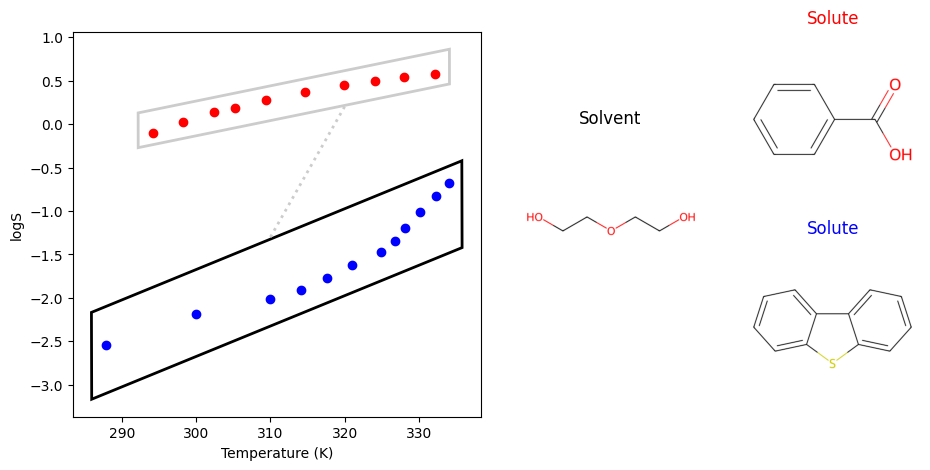

In [70]:
# pre-selected interesting example
row_i = ('10.1016/j.jct.2018.09.017', 'OCCOCCO', 'c1ccc2c(c1)sc1ccccc12')
row_j = ('10.1016/j.jct.2020.106234', 'OCCOCCO', 'O=C(O)c1ccccc1')
logS_i, temperature_i, _ = df.loc[row_i]
logS_j, temperature_j, _ = df.loc[row_j]
fig, axes_dict = plt.subplot_mosaic(
    """
AABC
AABD
""",
    figsize=(11, 5),
)
axes_dict['A'].scatter(x=temperature_i, y=logS_i, color='b', label='Train')
axes_dict['A'].scatter(x=temperature_j, y=logS_j, color='r', label="Test")
axes_dict["A"].set_xlabel("Temperature (K)")
axes_dict["A"].set_ylabel("logS")
rectangle = plt.Rectangle((temperature_i[0]-2, logS_i[0]+0.25), 50, 1, edgecolor='k', facecolor='none', linewidth=2, angle=2, rotation_point='center')
axes_dict["A"].add_patch(rectangle)
rectangle = plt.Rectangle((temperature_j[0]-2, logS_j[0]+0.2), 42, 0.4, edgecolor='0.8', facecolor='none', linewidth=2, angle=1, rotation_point='center')
axes_dict["A"].add_patch(rectangle)
axes_dict["A"].plot((310, 320), (-1.3, 0.2), color='0.8', linestyle=':', linewidth=2)
axes_dict["B"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[1]), size=(400, 400)))
axes_dict["B"].set_title("Solvent", color='k')
axes_dict["B"].set_axis_off()
axes_dict["D"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(400, 400)))
axes_dict["D"].set_title("Solute", color='b')
axes_dict["D"].set_axis_off()
axes_dict["C"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 400)))
axes_dict["C"].set_title("Solute", color='r')
axes_dict["C"].set_axis_off()


Below code was used to find the above interesting example - it does not run on its own in this state, and was just hacked at until something interesting came out.

In [3]:
def _f(r):
    try:
        grads = np.gradient(r["logS"], r["temperature"])
        mean_grad = np.mean(grads)
        if any(grads > mean_grad*3):
            return np.nan
        return mean_grad
    except:
        return np.nan

In [4]:
df["mean_grad"] = df.apply(_f, axis=1)
df

/home/jackson/miniconda3/envs/fprop/lib/python3.11/site-packages/numpy/lib/function_base.py:1259: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/jackson/miniconda3/envs/fprop/lib/python3.11/site-packages/numpy/lib/function_base.py:1266: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


logS  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.5642874348024691, 0.5678008492197518, 0.572...   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.6284647588895469, 0.660454253969981, 0.6722...   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.2274696735411672, -1.1348955395095144, -1....   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.8363982824293008, -1.7057014984837877, -1....   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.621708875671629, -1.5099385316467029, -1.4...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.3827196750473583, -1.8798711516740736, -1....   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.675198316534807, -0.6006174955632744, -0.5...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.694918644714379, -2.3845835868909986, -2.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.053597950437436, -1.855577513699243, -1.66...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.06242951816616407, 0.04867951745563479, 0....   

                                                                                                                       temperature  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   

                                                                                 mean_grad  
source                      solvent_smiles solute_smiles                                    
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O             0.000435  
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O             0.002259  
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         0.016681  
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         0.019982  
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         

In [5]:
df = df[np.isfinite(df["mean_grad"])]

In [12]:
count = 0
seen = set()
# for (i, row_i) in df.itertuples(index=True):
for idx_i, (row_i, logS_i, temperature_i, mean_grad_i) in enumerate(df.itertuples(index=True)):
    for idx_j, (row_j, logS_j, temperature_j, mean_grad_j) in enumerate(df.itertuples(index=True)):
        if row_i == row_j:
            continue
        if row_i[1] != row_j[1]:  # skip different solvent
            continue
        if row_i[2] == row_j[2]:  # skip same solute
            continue
        seen.add((idx_i, idx_j))
        if (idx_j, idx_i) in seen:
            continue
        if len(logS_i) < 10 or len(logS_j) < 10:
            continue
        # mistmatched gradients
        if np.abs(mean_grad_j - mean_grad_i) < 0.04:
            continue
        if np.abs(logS_i[0] - logS_j[1]) < 1:
            continue
        count += 1
        print(row_i, row_j)
        fig, axes_dict = plt.subplot_mosaic(
            """
        AABC
        AADE
        """,
            figsize=(14, 7),
        )
        axes_dict['A'].scatter(x=temperature_i, y=logS_i, color='b')
        axes_dict['A'].scatter(x=temperature_j, y=logS_j, color='r')
        axes_dict["A"].set_xlabel("Temperature (K)")
        axes_dict["A"].set_ylabel("logS")
        axes_dict["B"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[1]), size=(400, 400)))
        axes_dict["B"].set_title("Solvent", color='b')
        axes_dict["B"].set_axis_off()
        axes_dict["C"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(400, 400)))
        axes_dict["C"].set_title("Solute", color='b')
        axes_dict["C"].set_axis_off()
        axes_dict["D"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[1]), size=(400, 400)))
        axes_dict["D"].set_title("Solvent", color='r')
        axes_dict["D"].set_axis_off()
        axes_dict["E"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 400)))
        axes_dict["E"].set_title("Solute", color='r')
        axes_dict["E"].set_axis_off()
        plt.show()
    #     break
    # else:
    #     continue
    # break
count

149